## UCBerkeley  YikYak Text Analysis using R

So I decided to get data from UCBerkeley and analyse it to see what the students talk about most,or what are the words they use to thier yak.

## Why YikYak data

The reason I chose to use yikyak data is becuase yaks are annonymous and I feel like yaks will have more true emotion/feeling since no one knows who wrote it.

## How is this relevant

Lets assume I am in a student organization where we organize events and talks for student. This results can help me identify what students are really interested in.

If I collect more data. It could even help me identify a new product the student may be intrested in. 

In [27]:
## loads libraries 
library(tidyverse)
library(tidytext)
library(wordcloud)
library(RColorBrewer)

### Import data

In [15]:
## import data 
all_uc_data<- read_csv("uc_data.csv")


Parsed with column specification:
cols(
  Messages = col_character(),
  Number_of_replies = col_integer(),
  message = col_character(),
  num_reply = col_character(),
  Message = col_character()
)


### check number of rows

In [16]:
nrow(all_uc_yak)

[1] 1573

## check if some yaks were repeated and  remove them

In [20]:
# check to see if some sentences are repreating
all_uc_yak %>%
    count(Messages, sort = TRUE) %>%
    head()

#remove repeating yakes
uc_yak <- select(all_uc_yak,Messages)
uc_yak <- unique(uc_yak)
nrow(uc_yak)

Messages,n
NA,265
ALL ABOARD THE DAB TRAIN *dabs*,4
Any good songs that heals up a broken heart?,4
Anybody planning to study abroad next academic yr through the SF State Exchange Program?,4
Anyone tryna smoke rn?,4
Caffeines hell of a drug,4


[1] 722

## tokenize the data by word and plot the most used word

Joining, by = "word"


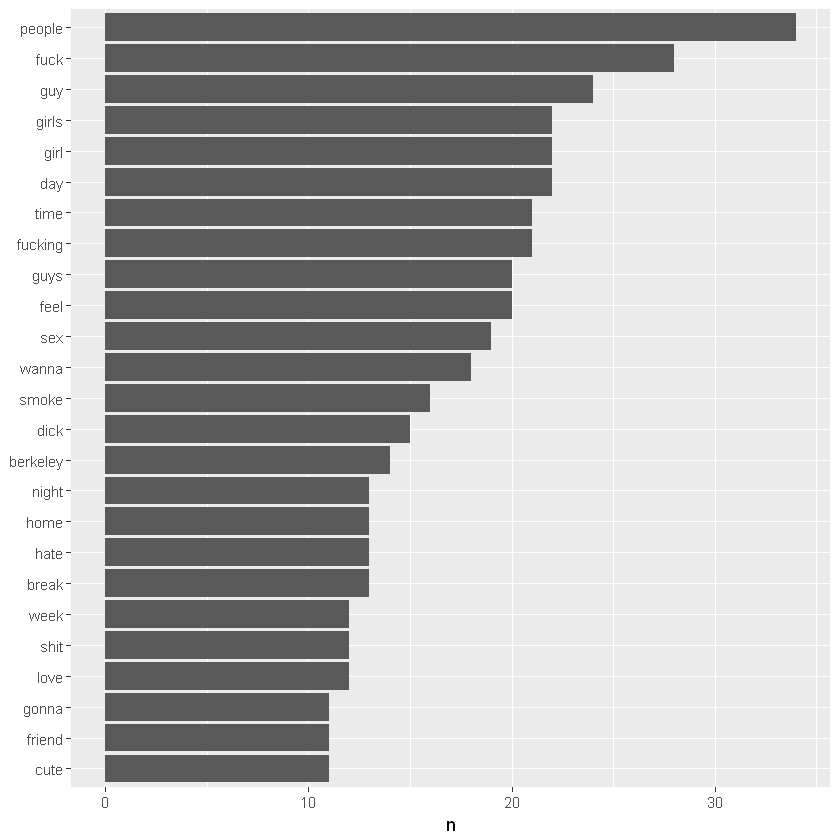

In [21]:
tidy_yaks <- uc_yak %>%
                unnest_tokens(word,Messages)

data(stop_words)

tidy_yaks <- tidy_yaks %>%
                anti_join(stop_words) # this will drop all the words in that are in the stop_words

## count for the most used word
#pdf("freq_word.pdf")
tidy_yaks %>%
    count(word, sort = TRUE) %>%
    filter(n > 10) %>%
    mutate(word = reorder(word, n)) %>%
    ggplot(aes(word, n)) +
    geom_col() +
    xlab(NULL) +
    coord_flip()
#dev.off()

## Create a wordcloud for easy visualization of the frequent word

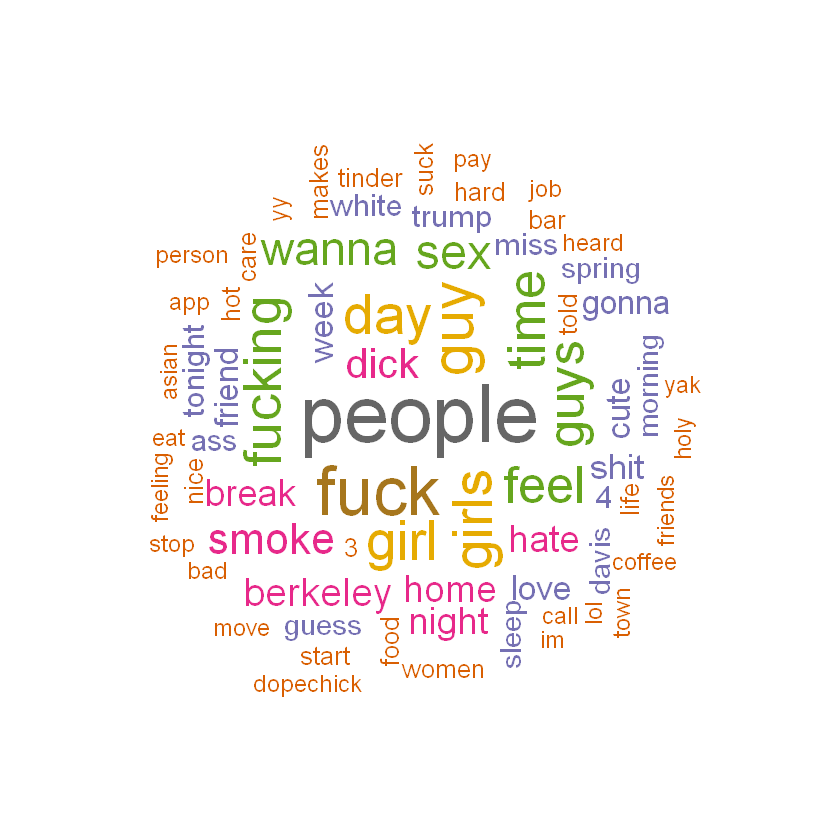

In [28]:
tidy_yaks %>%
    count(word) %>%
    filter(n > 6) %>%
    with(wordcloud(word,n,max.words = 200,random.order=FALSE,min.freq = 1,rot.per=0.35,colors=brewer.pal(8, "Dark2")))

## I want to make some sentiment analysis here to group the words into positve or negative. To see if they use more negative words than positive. Are they angry or happy? 

Joining, by = "word"
Selecting by n


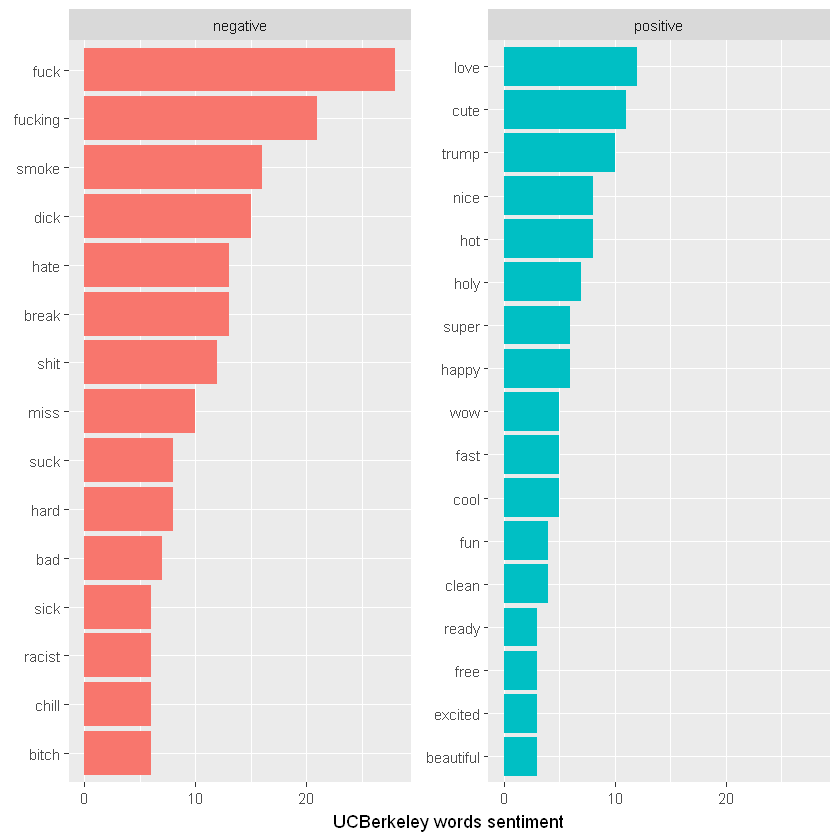

In [29]:
bing_word_count <- tidy_yaks %>%
                    inner_join(get_sentiments("bing")) %>%
                    count(word, sentiment, sort = TRUE) %>%
                    ungroup()
bing_word_count %>%
  group_by(sentiment) %>%
  top_n(15) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "UCBerkeley words sentiment",
       x = NULL) +
  coord_flip()

Creating another word count to group the negative and positive words that they use

Joining, by = "word"


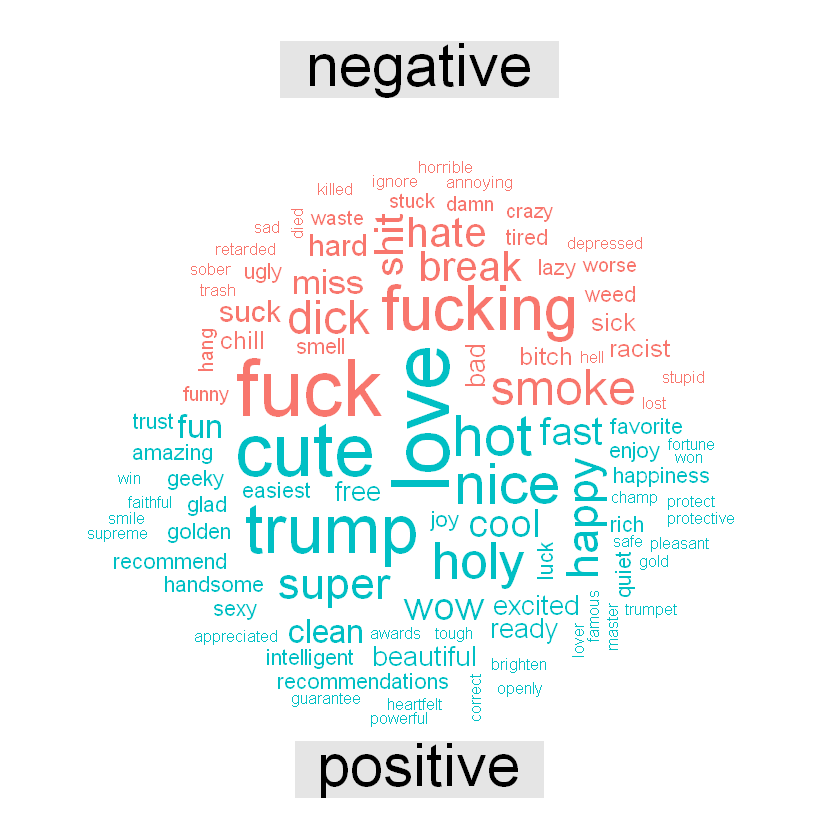

In [30]:
tidy_yaks %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("#F8766D", "#00BFC4"),
                   max.words = 100)

Below is some yaks from student about how they feel about trump

In [25]:
uc_yak[grep("trump",uc_yak$Messages),]

Messages
"i voted for trump and am bitterly disappointed. he doesn't understand what's happening. he had no idea what was in the health care bill. he threatened no voters, and they laughed at him."
Omg I heard the funniest joke ever!!! Some one said Donald trumpet ahahahahahaahahahahahahabahahahabaababhahaha people are so genius. Funniest thing I've heard in my entire laugh. I'm dying
Russia hired 1000 people to create anti-Clinton fake news in key us states during elections according to the trump Russia hearings
Www.trumpunuviversity.com/CalRejects/Failure/ApplyCSUdavis
Some bikers are doing another free speech pro trump rally on the 15th in Berkeley


Below is some yaks from student about smoke.

In [26]:
uc_yak[grep("smoke",uc_yak$Messages),]

Messages
"""Do you smoke weed"" is not a pickup line please stop using it as one."
Who wants to smoke some blue dream on south side?
Anyone tryna smoke rn?
where are some good smoke spots not in SF besides fish ranch?
Visiting from Hawaii any one wanna smoke and chill. Leave manana!
Where are good places to just chill and smoke with a drink? any smoke lounges or bars that let you smoke in berkeley?
"Hung out with a yikyak famous guy in Oakland today, I smoked weed he drank beer. His bike is sick"
Who wants to smoke and chill just message me I'm on Hyde st!
Who wants to smoke in berkeley tonight
Best smoke spots around pleasant Hill/lafayette?


## To conclude:

* From my intuition, I can say that, UCBerkeley student will be interested in a political talk, if i want to organize a talk or a debate
* I could also say that I would likely make money if I sell (weed) assuming it was legal in Califonia.
* Most words I see do not suprise me at all 

__I could probably find more intresting insight if I gather more data for a week or two or even a month__
